# **House Prices - Advanced Regression Techniques**

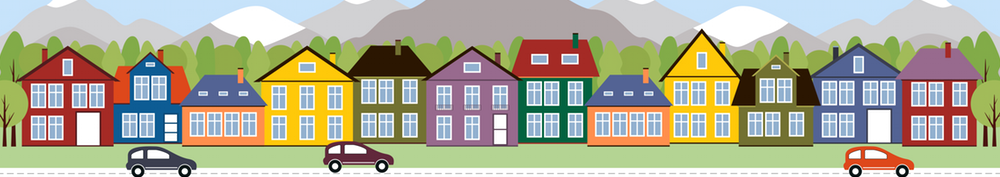

In [1]:
from IPython.display import Image
Image('housesbanner.png')

In [2]:
from data import Data
import pandas as pd

In [3]:
dataframe = Data()

## ** Analyzing the shape of the data **

In [4]:
df = dataframe.read_original_data('train.csv')

In [5]:
df.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


### *Champs de données*
 
Voici une brève description des données.

*SalePrice:le prix de vente de la propriété en dollars. C'est la variable cible à prédire.

*OverallQual: Qualité globale du matériau et de la finition

*LotArea : Taille du lot en pieds carrés

*TotalBsmtSF : superficie totale en pieds carrés du sous-sol

*GrLivArea : Surface habitable au -dessus du sol en pieds carrés

*TotRmsAbvGrd : Nombre total de chambres au-dessus du niveau du sol (n'inclut pas les salles de bains)

*Fonctionnel : évaluation de la fonctionnalité de la maison

*GarageArea : Superficie du garage en pieds carrés

*MoSold : Mois vendu

*YrSold : Année Vendu

*SaleType : Type de vente

*VenteCondition : Condition de vent

In [6]:
dataframe.analys_form_dataframe(df)

-------------------------------------------------------------------------------
-------------------- The dataframe's shape: (1460, 81)
-------------------------------------------------------------------------------
-------------------- Info. dataframe
-------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null

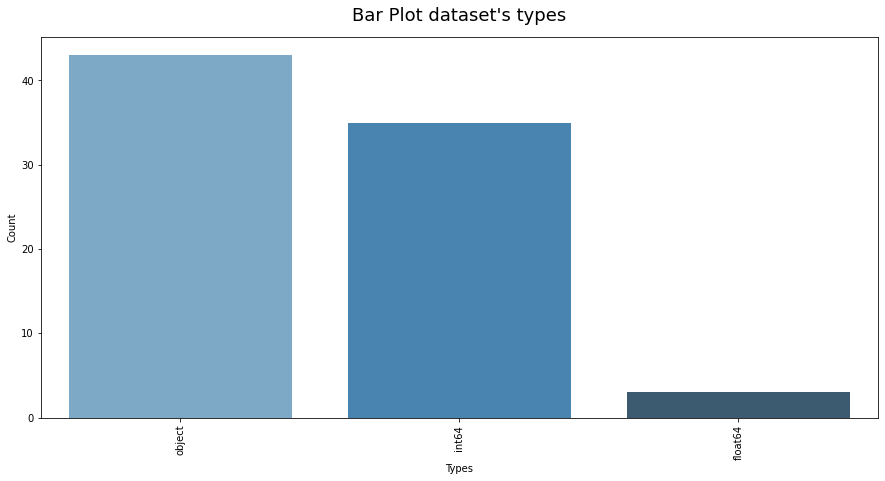

In [7]:
dataframe.plot_dataset_types(df)

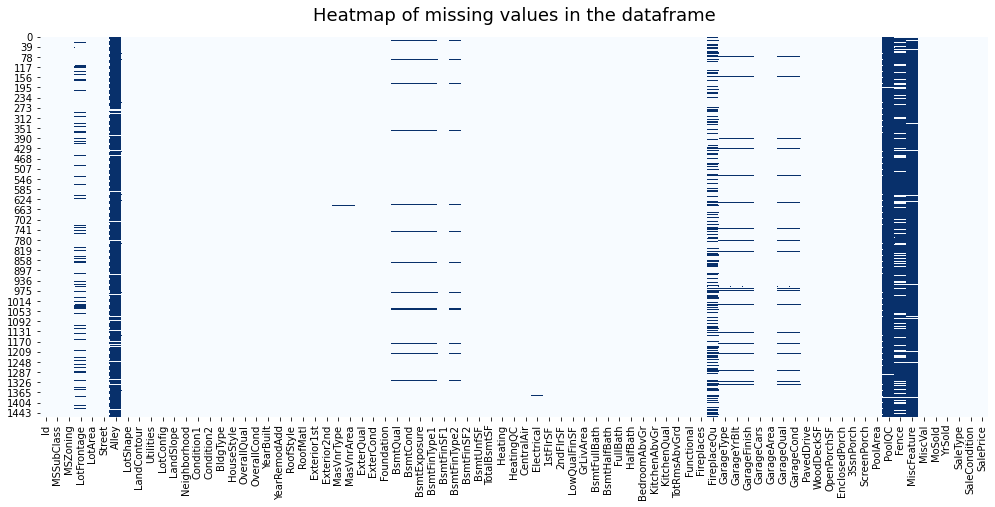

In [8]:
dataframe.show_map_missing_values(df)

In [9]:
dataframe.calculate_missing_values(df)

-------------------------------------------------------------------------------
-------------------- Calculate missing values in the dataframe
-------------------------------------------------------------------------------


Id               0.000000
TotalBsmtSF      0.000000
Heating          0.000000
SaleCondition    0.000000
CentralAir       0.000000
                   ...   
FireplaceQu      0.472603
Fence            0.807534
Alley            0.937671
MiscFeature      0.963014
PoolQC           0.995205
Length: 81, dtype: float64

## ** Cleaning Data **

### *DELETE unnecessary columns with 80% or more of missing values*

In [10]:
house_prices_data = df.copy()

In [11]:
# REMOVE unnecessary columns
house_prices_data = dataframe.delet_features_having_more_then_80_per_cent_miss_values(house_prices_data)

### *OBSERVE our database a second time & FIND other solutions to deal with missing values*

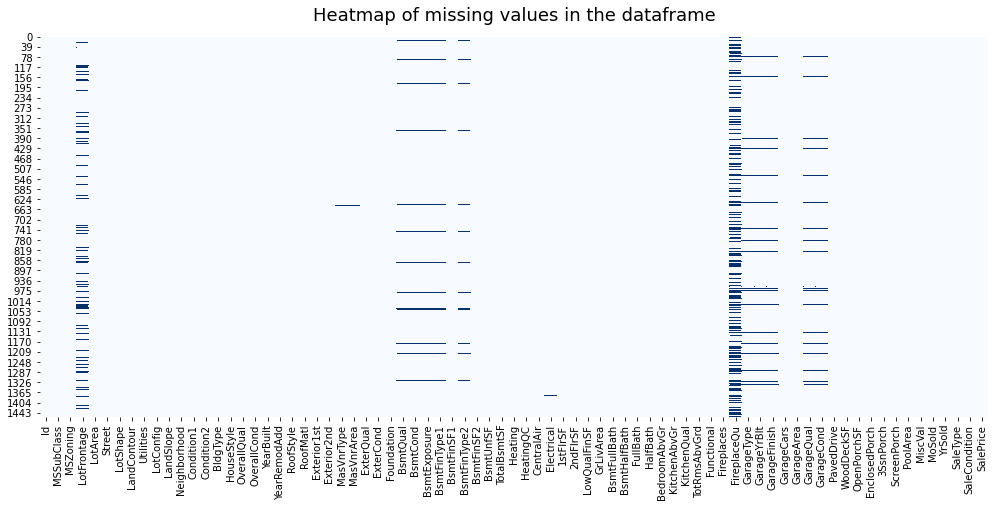

In [12]:
dataframe.show_map_missing_values(house_prices_data)

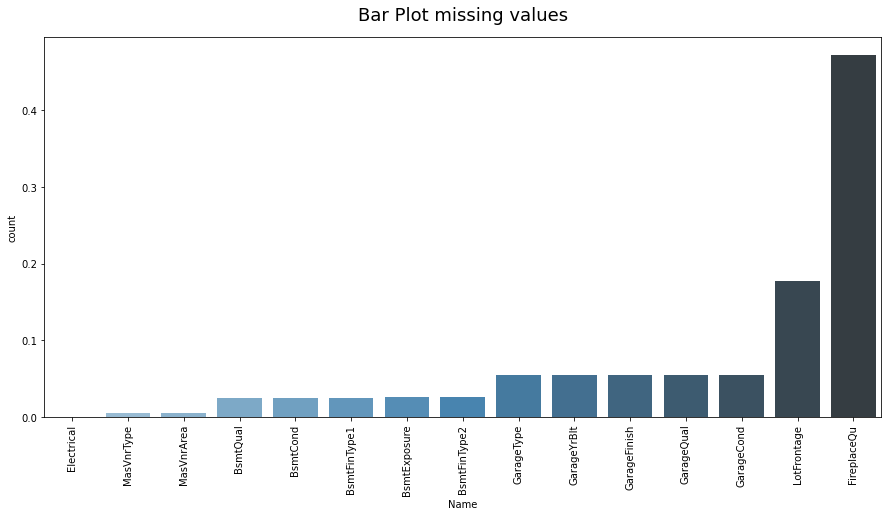

In [13]:
dataframe.plot_missing_values(house_prices_data)

### *ANALYZE unique value counts of each column*

#### *ANALYZE unique missing values of each column*

In [14]:
dataframe.missing_value_counts_df(house_prices_data)

-------------------------------------------------------------------------------
 Count missing values of each column
-------------------------------------------------------------------------------
False    1201
True      259
Name: LotFrontage, dtype: int64
----------------------------------------
False    1452
True        8
Name: MasVnrType, dtype: int64
----------------------------------------
False    1452
True        8
Name: MasVnrArea, dtype: int64
----------------------------------------
False    1423
True       37
Name: BsmtQual, dtype: int64
----------------------------------------
False    1423
True       37
Name: BsmtCond, dtype: int64
----------------------------------------
False    1422
True       38
Name: BsmtExposure, dtype: int64
----------------------------------------
False    1423
True       37
Name: BsmtFinType1, dtype: int64
----------------------------------------
False    1422
True       38
Name: BsmtFinType2, dtype: int64
----------------------------------------


#### *ANALYZE unique values of each column*

In [15]:
dataframe.value_counts_all_columns_df(house_prices_data)

1460    1
479     1
481     1
482     1
483     1
       ..
976     1
977     1
978     1
979     1
1       1
Name: Id, Length: 1460, dtype: int64

-----------------------------------------

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

-----------------------------------------

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

-----------------------------------------

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
106.0      1
38.0       1
138.0      1
140.0      1
137.0      1
Name: LotFrontage, Length: 110, dtype: int64

-----------------------------------------

7200     25
9600     24
6000     17
10800    14
9000     14
         ..
7094      1
6130      1
9337      1
5232      1
8190      1
Name: LotArea, Length: 1073, dtype: int64

---------

TA    735
Gd    586
Ex    100
Fa     39
Name: KitchenQual, dtype: int64

-----------------------------------------

6     402
7     329
5     275
8     187
4      97
9      75
10     47
11     18
3      17
12     11
14      1
2       1
Name: TotRmsAbvGrd, dtype: int64

-----------------------------------------

Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: Functional, dtype: int64

-----------------------------------------

0    690
1    650
2    115
3      5
Name: Fireplaces, dtype: int64

-----------------------------------------

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

-----------------------------------------

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

-----------------------------------------

2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
          ..
1908.0     1
1927.0     1
1933.0     1
19

### *ANALYZE description of Dataset columns*

In [16]:
house_prices_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [17]:
df_missing_values = dataframe.get_dataset_of_missing_val(house_prices_data)
df_missing_values.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
LotFrontage,1201,NaN,NaN,NaN,70.05,24.2848,21,59,69,80,313
MasVnrType,1452,4,None,864,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MasVnrArea,1452,NaN,NaN,NaN,103.685,181.066,0,0,0,166,1600
BsmtQual,1423,4,TA,649,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BsmtCond,1423,4,TA,1311,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BsmtExposure,1422,4,No,953,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BsmtFinType1,1423,6,Unf,430,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BsmtFinType2,1422,6,Unf,1256,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Electrical,1459,5,SBrkr,1334,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FireplaceQu,770,5,Gd,380,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Comments:
    ...
    ...
    ...

### *IMPUT Missing Data*

#### *IMPUT Numerical Missing Data*

In [18]:
# IMPUT Numerical Missing Data using 'mean' strategy
df= dataframe.simpleImputer_missing_value(['LotFrontage'], house_prices_data, 'mean')
house_prices_data['LotFrontage'] = pd.DataFrame(df)
house_prices_data['LotFrontage']

0       65.0
1       80.0
2       68.0
3       60.0
4       84.0
        ... 
1455    62.0
1456    85.0
1457    66.0
1458    68.0
1459    75.0
Name: LotFrontage, Length: 1460, dtype: float64

In [19]:
# IMPUT Numerical Missing Data using 'median' strategy
df1= dataframe.simpleImputer_missing_value(['MasVnrArea'], house_prices_data, 'median')
house_prices_data['MasVnrArea'] = pd.DataFrame(df1)
house_prices_data['MasVnrArea']

0       196.0
1         0.0
2       162.0
3         0.0
4       350.0
        ...  
1455      0.0
1456    119.0
1457      0.0
1458      0.0
1459      0.0
Name: MasVnrArea, Length: 1460, dtype: float64

In [20]:
# IMPUT Numerical Missing Data using 'constant' strategy
df2= dataframe.simpleImputer_missing_value(['GarageYrBlt'], house_prices_data, 'median')
house_prices_data['GarageYrBlt'] = pd.DataFrame(df2)
house_prices_data['GarageYrBlt']

0       2003.0
1       1976.0
2       2001.0
3       1998.0
4       2000.0
         ...  
1455    1999.0
1456    1978.0
1457    1941.0
1458    1950.0
1459    1965.0
Name: GarageYrBlt, Length: 1460, dtype: float64

#### *IMPUT Categorical Missing Data*

In [21]:
# IMPUT Categorical Missing Data using 'constant' strategy
df3= dataframe.simpleImputer_missing_value_with_constant(['MasVnrType'], house_prices_data, 'constant', 'BrkFace')
house_prices_data['MasVnrType'] = pd.DataFrame(df3)
house_prices_data['MasVnrType']

0       BrkFace
1          None
2       BrkFace
3          None
4       BrkFace
         ...   
1455       None
1456      Stone
1457       None
1458       None
1459       None
Name: MasVnrType, Length: 1460, dtype: object

In [22]:
# IMPUT Categorical Missing Data using 'most_frequent' strategy
df4= dataframe.simpleImputer_missing_value(['BsmtQual'], house_prices_data, 'most_frequent')
house_prices_data['BsmtQual'] = pd.DataFrame(df4)
house_prices_data['BsmtQual']

0       Gd
1       Gd
2       Gd
3       TA
4       Gd
        ..
1455    Gd
1456    Gd
1457    TA
1458    TA
1459    TA
Name: BsmtQual, Length: 1460, dtype: object

In [23]:
# IMPUT Categorical Missing Data using 'most_frequent' strategy
df5= dataframe.simpleImputer_missing_value(['BsmtCond'], house_prices_data, 'most_frequent')
house_prices_data['BsmtCond'] = pd.DataFrame(df5)
house_prices_data['BsmtCond']

0       TA
1       TA
2       TA
3       Gd
4       TA
        ..
1455    TA
1456    TA
1457    Gd
1458    TA
1459    TA
Name: BsmtCond, Length: 1460, dtype: object

In [24]:
# IMPUT Categorical Missing Data using 'most_frequent' strategy
df6= dataframe.simpleImputer_missing_value(['BsmtExposure'], house_prices_data, 'most_frequent')
house_prices_data['BsmtExposure'] = pd.DataFrame(df6)
house_prices_data['BsmtExposure']

0       No
1       Gd
2       Mn
3       No
4       Av
        ..
1455    No
1456    No
1457    No
1458    Mn
1459    No
Name: BsmtExposure, Length: 1460, dtype: object

In [25]:
# IMPUT Categorical Missing Data using 'most_frequent' strategy
df7= dataframe.simpleImputer_missing_value(['BsmtFinType1'], house_prices_data, 'most_frequent')
house_prices_data['BsmtFinType1'] = pd.DataFrame(df7)
house_prices_data['BsmtFinType1']

0       GLQ
1       ALQ
2       GLQ
3       ALQ
4       GLQ
       ... 
1455    Unf
1456    ALQ
1457    GLQ
1458    GLQ
1459    BLQ
Name: BsmtFinType1, Length: 1460, dtype: object

In [26]:
# IMPUT Categorical Missing Data using 'most_frequent' strategy
df8= dataframe.simpleImputer_missing_value(['BsmtFinType2'], house_prices_data, 'most_frequent')
house_prices_data['BsmtFinType2'] = pd.DataFrame(df8)
house_prices_data['BsmtFinType2']

0       Unf
1       Unf
2       Unf
3       Unf
4       Unf
       ... 
1455    Unf
1456    Rec
1457    Unf
1458    Rec
1459    LwQ
Name: BsmtFinType2, Length: 1460, dtype: object

In [27]:
# IMPUT Categorical Missing Data using 'most_frequent' strategy
df9= dataframe.simpleImputer_missing_value(['Electrical'], house_prices_data, 'most_frequent')
house_prices_data['Electrical'] = pd.DataFrame(df9)
house_prices_data['Electrical']

0       SBrkr
1       SBrkr
2       SBrkr
3       SBrkr
4       SBrkr
        ...  
1455    SBrkr
1456    SBrkr
1457    SBrkr
1458    FuseA
1459    SBrkr
Name: Electrical, Length: 1460, dtype: object

In [28]:
# IMPUT Categorical Missing Data using 'most_frequent' strategy
df10= dataframe.simpleImputer_missing_value(['FireplaceQu'], house_prices_data, 'most_frequent')
house_prices_data['FireplaceQu'] = pd.DataFrame(df10)
house_prices_data['FireplaceQu']

0       Gd
1       TA
2       TA
3       Gd
4       TA
        ..
1455    TA
1456    TA
1457    Gd
1458    Gd
1459    Gd
Name: FireplaceQu, Length: 1460, dtype: object

In [29]:
# IMPUT Categorical Missing Data using 'most_frequent' strategy
df11= dataframe.simpleImputer_missing_value(['GarageType'], house_prices_data, 'most_frequent')
house_prices_data['GarageType'] = pd.DataFrame(df11)
house_prices_data['GarageType']

0       Attchd
1       Attchd
2       Attchd
3       Detchd
4       Attchd
         ...  
1455    Attchd
1456    Attchd
1457    Attchd
1458    Attchd
1459    Attchd
Name: GarageType, Length: 1460, dtype: object

In [30]:
# IMPUT Categorical Missing Data using 'most_frequent' strategy
df12= dataframe.simpleImputer_missing_value(['GarageFinish'], house_prices_data, 'most_frequent')
house_prices_data['GarageFinish'] = pd.DataFrame(df12)
house_prices_data['GarageFinish']

0       RFn
1       RFn
2       RFn
3       Unf
4       RFn
       ... 
1455    RFn
1456    Unf
1457    RFn
1458    Unf
1459    Fin
Name: GarageFinish, Length: 1460, dtype: object

In [31]:
# IMPUT Categorical Missing Data using 'most_frequent' strategy
df13= dataframe.simpleImputer_missing_value(['GarageQual'], house_prices_data, 'most_frequent')
house_prices_data['GarageQual'] = pd.DataFrame(df13)
house_prices_data['GarageQual']

0       TA
1       TA
2       TA
3       TA
4       TA
        ..
1455    TA
1456    TA
1457    TA
1458    TA
1459    TA
Name: GarageQual, Length: 1460, dtype: object

In [32]:
# IMPUT Categorical Missing Data using 'most_frequent' strategy
df14= dataframe.simpleImputer_missing_value(['GarageCond'], house_prices_data, 'most_frequent')
house_prices_data['GarageCond'] = pd.DataFrame(df14)
house_prices_data['GarageCond']

0       TA
1       TA
2       TA
3       TA
4       TA
        ..
1455    TA
1456    TA
1457    TA
1458    TA
1459    TA
Name: GarageCond, Length: 1460, dtype: object

###

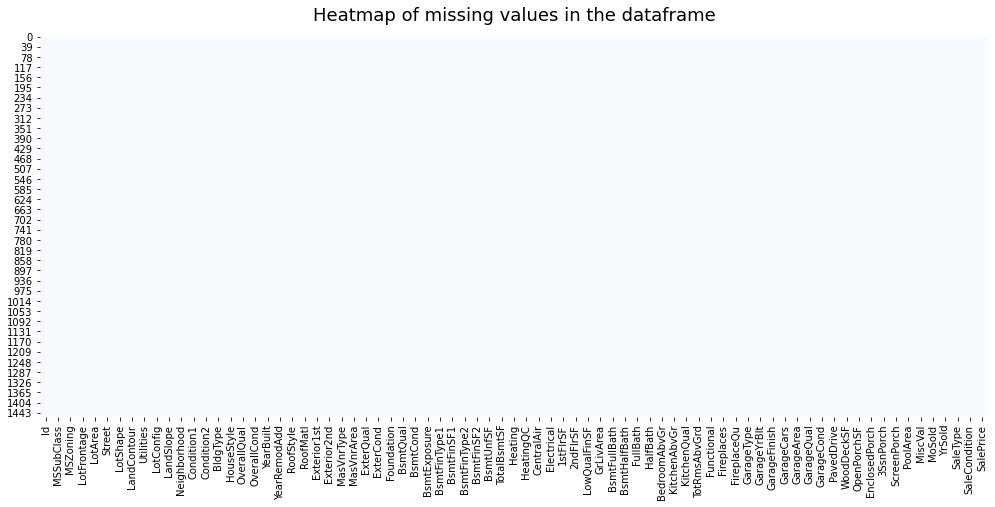

In [33]:
dataframe.show_map_missing_values(house_prices_data)

In [34]:
house_prices_data.to_csv('house_prices_cleaned_data.csv')